In [52]:
import os
# Directories
notebooks_dir = os.getcwd()  # Current working directory of the notebook
base_dir = os.path.dirname(notebooks_dir)
data_dir = os.path.join(base_dir, 'data')
raw_data_dir = os.path.join(data_dir, 'raw')
scripts_dir = os.path.join(base_dir, 'scripts')

results_dir = os.path.join(base_dir, 'results')
eda_results_dir = os.path.join(results_dir, 'eda')


print('Notebook Directory:', notebooks_dir)
print("Base Directory:", base_dir)
print("Data Directory:", data_dir)
print("Raw Data Directory:", raw_data_dir)

Notebook Directory: /Users/alessioguarachi/Desktop/single-ECG-classification/notebooks
Base Directory: /Users/alessioguarachi/Desktop/single-ECG-classification
Data Directory: /Users/alessioguarachi/Desktop/single-ECG-classification/data
Raw Data Directory: /Users/alessioguarachi/Desktop/single-ECG-classification/data/raw


In [53]:
# Load the data
import pandas as pd
import seaborn as sns
sns.set_palette(sns.color_palette('viridis'))


train_df = pd.read_csv(os.path.join(raw_data_dir, 'mitbih_train.csv'), header=None)
test_df = pd.read_csv(os.path.join(raw_data_dir, 'mitbih_test.csv'), header=None)

print('Train dataset shape:',train_df.shape) #(87554, 188)
print('Test dataset shape:',test_df.shape) #(21892, 188)
print('Type of train_df:',type(train_df))

# Extract the features and labels
x_train = train_df.iloc[:, :-1].values # All the column except the last one 
y_train = train_df.iloc[:, -1].values # The last column

x_test = test_df.iloc[:, :-1].values
y_test = test_df.iloc[:, -1].values

print('\nx_train:',x_train)
print('y_train:',y_train)
print('\nx_train shape:',x_train.shape)
print('y_train shape:',y_train.shape)
print('\ntype of x_train:',type(x_train))

Train dataset shape: (87554, 188)
Test dataset shape: (21892, 188)
Type of train_df: <class 'pandas.core.frame.DataFrame'>

x_train: [[0.97794116 0.92647058 0.68137252 ... 0.         0.         0.        ]
 [0.96011394 0.86324787 0.46153846 ... 0.         0.         0.        ]
 [1.         0.65945947 0.18648648 ... 0.         0.         0.        ]
 ...
 [0.90612245 0.62448978 0.59591836 ... 0.         0.         0.        ]
 [0.85822785 0.64556962 0.84556961 ... 0.         0.         0.        ]
 [0.90150636 0.84588647 0.80069524 ... 0.         0.         0.        ]]
y_train: [0. 0. 0. ... 4. 4. 4.]

x_train shape: (87554, 187)
y_train shape: (87554,)

type of x_train: <class 'numpy.ndarray'>


Text(0.5, 1.0, 'First ECG signal in the training set')

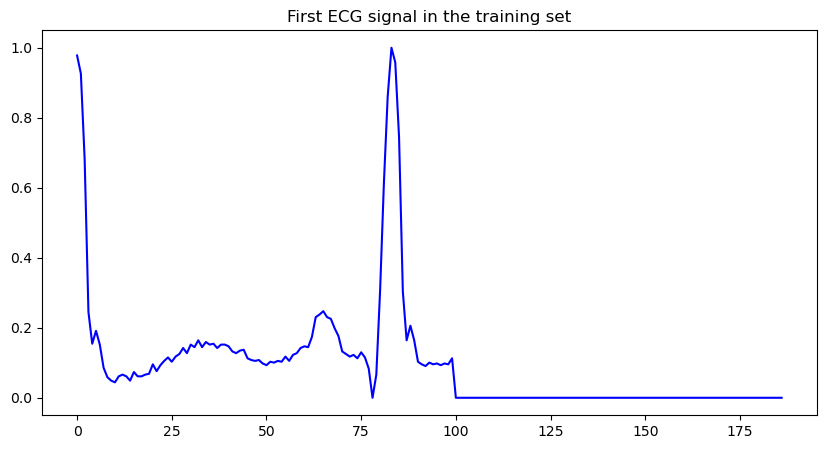

In [54]:
import sys
sys.path.append(scripts_dir)

import matplotlib.pyplot as plt

# Plot of a signal
plt.figure(figsize=(10, 5))
plt.plot(x_train[0], color='blue')
plt.title('First ECG signal in the training set')

In [55]:
from util import plot_interactive_idx

# Interactive exploration of the ECG signals in the training set
plot_interactive_idx(x_train, y_train)

interactive(children=(IntSlider(value=0, description='Index', max=87553), Output()), _dom_classes=('widget-int…

#### Visualization ECG signals for the different classes

class_labels: [0. 1. 2. 3. 4.]
0.0
1.0
2.0
3.0
4.0


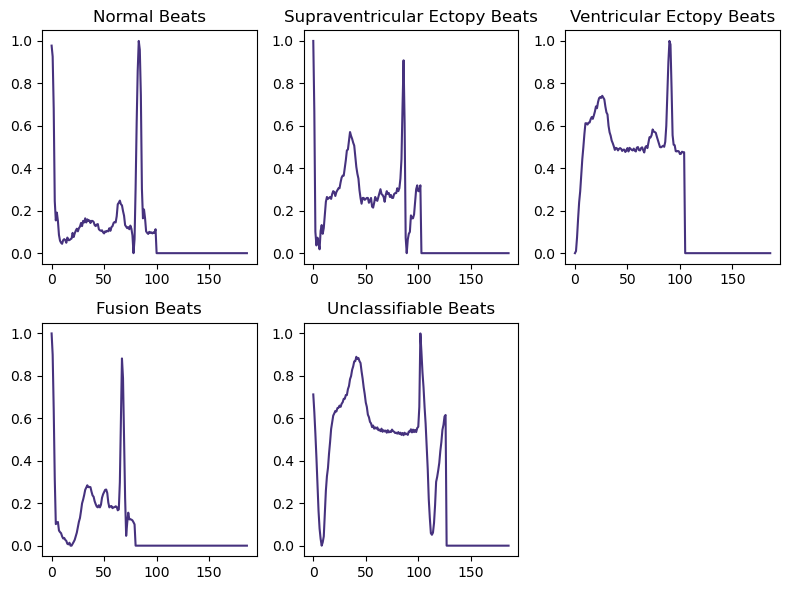

In [56]:
import numpy as np
import matplotlib.pyplot as plt

class_names = ["Normal Beats","Supraventricular Ectopy Beats","Ventricular Ectopy Beats","Fusion Beats","Unclassifiable Beats"]

class_labels, class_counts = np.unique(y_train, return_counts=True) # unique values in the target column [0., 1., 2., 3., 4.]
print('class_labels:',class_labels)

plt.figure(figsize=(8, 6))

for i,label in enumerate(class_labels):
    idx = np.where(y_train == label)[0][0]
    print(label)
    plt.subplot(2,3,i+1) #plt.subplot(1,len(class_labels),i+1)
    plt.plot(x_train[idx,:])
    plt.title(class_names[i])
    
plt.tight_layout()
plt.savefig(os.path.join(eda_results_dir, 'ECG_signals.png'), dpi=300, bbox_inches='tight')
plt.show()

## Class distribution
I should try to use barplot instead of an histplot!!!!

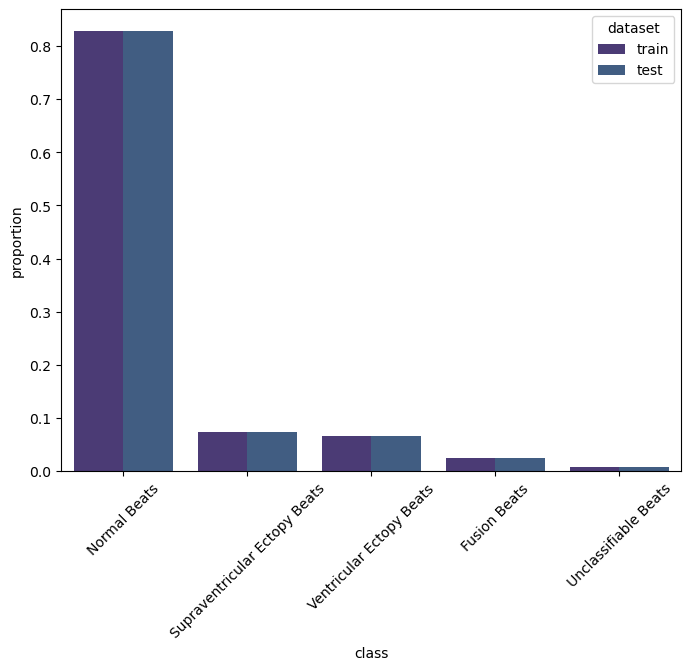

In [57]:
y_train_series = pd.Series(y_train)
y_test_series = pd.Series(y_test)

count_train = y_train_series.value_counts()
count_test = y_test_series.value_counts()

# Proportions
train_proportions = count_train / count_train.sum()
test_proportions = count_test / count_test.sum()

proportion_df = pd.DataFrame({
    'class': class_names, # np.unique(y_train)
    'train': train_proportions,
    'test': test_proportions
})

proportion_df_melted = pd.melt(proportion_df, id_vars='class', var_name='dataset', value_name='proportion')

plt.figure(figsize=(8,6))
sns.barplot(x='class',y='proportion',hue='dataset', data=proportion_df_melted)
plt.xticks(rotation=45)
plt.savefig(os.path.join(eda_results_dir, 'class_distribution_train_test.png'), dpi=300, bbox_inches='tight')
plt.show()

Shape of class_avg_array: (5, 187)


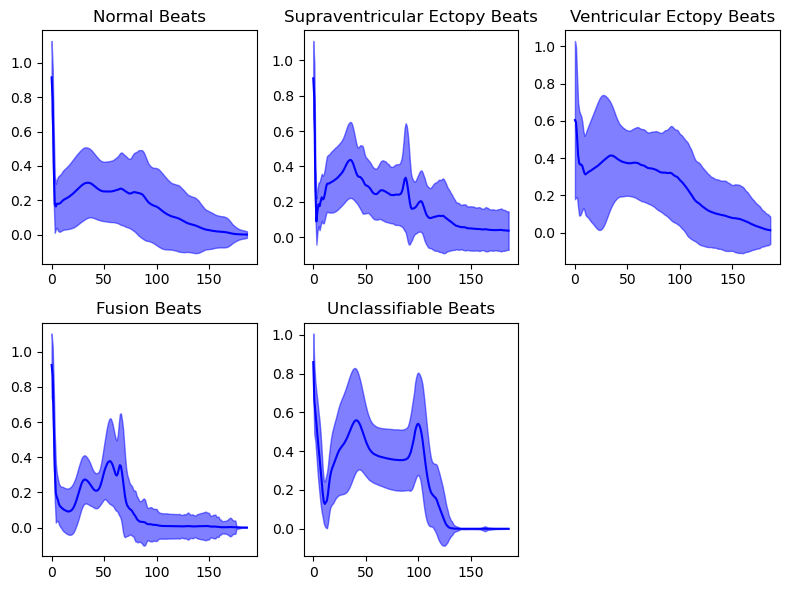

In [58]:
# Average across classes
df =pd.DataFrame(x_train)
df['label'] = y_train

class_avg = df.groupby('label').mean()
class_std = df.groupby('label').std()

class_avg_array = class_avg.to_numpy()
class_std_array = class_std.to_numpy()

print('Shape of class_avg_array:',class_avg_array.shape)

avg_signals = []

plt.figure(figsize=(8, 6))
for i in range(class_avg_array.shape[0]):
    plt.subplot(2,3,i+1)
    x = range(class_avg_array.shape[1])
    y = class_avg_array[i, :]
    yerr = class_std_array[i, :]

    # Plot the mean with error bars
    #plt.errorbar(x, y, yerr=yerr, fmt='-o', label='Mean ± STD')
    plt.fill_between(x, y - yerr, y + yerr, color='blue', alpha=0.5, label='Mean ± STD')
    plt.plot(x, y, color='blue', label='Mean Signal')
    plt.title(class_names[i])

plt.tight_layout()
plt.savefig(os.path.join(eda_results_dir, 'avg_ECG_signals.png'), dpi=300, bbox_inches='tight')
plt.show()
